In [1]:
from data.dataset import load_dataset
from helpers.data_research import data_research, remove_unnecessary_columns
from helpers.correlataion import find_correlated_columns
from data.create_dataset import create_dataset

from models.RNN_Model import create_RNN_model

In [2]:
dataset = load_dataset()
print(dataset)

NaN: False
        entry  wsid     wsnm  elvt        lat        lon  inme     city prov  \
0       78048   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
1       78049   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
2       78050   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
3       78051   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
4       78052   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
...       ...   ...      ...   ...        ...        ...   ...      ...  ...   
86947  164995   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
86948  164996   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
86949  164997   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
86950  164998   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   
86951  164999   303  VITÓRIA   9.0 -20.271094 -40.306069  A612  Vitória   ES   

                      mdct  

In [3]:
dataset = remove_unnecessary_columns(dataset)

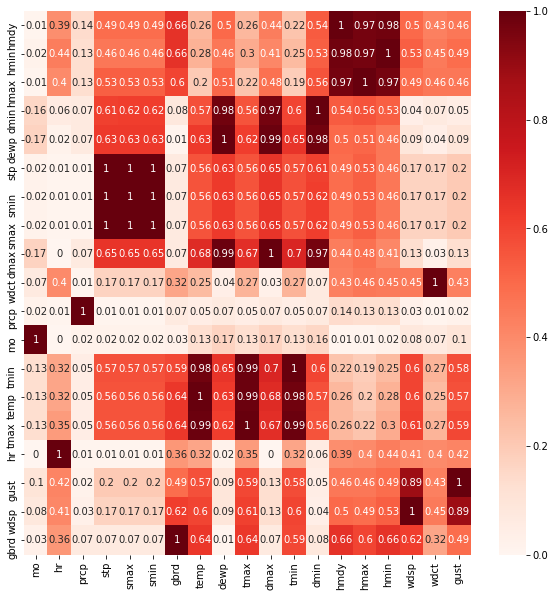

hmdy    1.000000
hmin    0.982933
hmax    0.971901
dmin    0.542419
dewp    0.500384
stp     0.490571
smin    0.488822
smax    0.488476
dmax    0.442209
wdct    0.431938
prcp    0.138798
tmin    0.218327
temp    0.256927
tmax    0.261704
hr      0.394276
gust    0.456949
wdsp    0.504015
gbrd    0.659205
Name: hmdy, dtype: float64


In [4]:
features_hmdy = features_hmdy = find_correlated_columns(dataset, 'hmdy')

In [5]:
X_hmdy = dataset.drop(columns=['hmdy', 'hmax', 'hmin'])
print(X_hmdy)
print(f"Shape: {X_hmdy.shape}")

       mo  hr  prcp     stp    smax    smin     gbrd  temp  dewp  tmax  dmax  \
0      10   0   0.0     0.0     0.0     0.0    0.000   0.0   0.0   0.0   0.0   
1      10   1   0.0     0.0     0.0     0.0    0.000   0.0   0.0   0.0   0.0   
2      10   2   0.0     0.0     0.0     0.0    0.000   0.0   0.0   0.0   0.0   
3      10   3   0.0     0.0     0.0     0.0    0.000   0.0   0.0   0.0   0.0   
4      10   4   0.0     0.0     0.0     0.0    0.000   0.0   0.0   0.0   0.0   
...    ..  ..   ...     ...     ...     ...      ...   ...   ...   ...   ...   
86947   9  19   0.0  1015.3  1015.3  1015.0  309.071  23.8  18.0  24.3  18.2   
86948   9  20   0.0  1015.7  1015.7  1015.3  160.676  23.6  18.3  23.9  18.3   
86949   9  21   0.0  1016.0  1016.0  1015.6   17.438  23.3  18.9  23.6  18.9   
86950   9  22   0.0  1016.5  1016.6  1015.9    0.000  23.0  18.6  23.3  19.4   
86951   9  23   0.0  1017.8  1017.8  1016.5    0.000  22.7  18.8  23.1  18.8   

       tmin  dmin  wdsp   wdct  gust  


In [6]:
y_hmdy = create_dataset(dataset, ['hmdy'])
print(y_hmdy.shape)

(86952, 1)


In [7]:
model = create_RNN_model(X_hmdy, y_hmdy)

Epoch 1/600
1304/1305 [============================>.] - ETA: 0s - loss: 268.2604

ValueError: in user code:

    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 16]
